In [1]:
import requests
import pandas as pd
import numpy as np
import json
import matplotlib as plt

In [2]:
url = 'https://stats.nba.com/stats/playerprofilev2?LeagueID=&PerMode=Totals&PlayerID=201935'
headers = {'user-agent': 'Mozilla/5.0 (Windows 10; Win64; x64) Chrome/38.0.2114.2 Safari/537.36'}

In [3]:
test = requests.get(url, headers= headers)

In [4]:
test.status_code

200

In [5]:
a = test.json()

In [6]:
b = a['resultSets'].copy()

In [7]:
c = b[0].copy()

In [8]:
test98 = c['headers']

In [9]:
test98

['PLAYER_ID',
 'SEASON_ID',
 'LEAGUE_ID',
 'TEAM_ID',
 'TEAM_ABBREVIATION',
 'PLAYER_AGE',
 'GP',
 'GS',
 'MIN',
 'FGM',
 'FGA',
 'FG_PCT',
 'FG3M',
 'FG3A',
 'FG3_PCT',
 'FTM',
 'FTA',
 'FT_PCT',
 'OREB',
 'DREB',
 'REB',
 'AST',
 'STL',
 'BLK',
 'TOV',
 'PF',
 'PTS']

In [27]:
df99 = pd.DataFrame.from_dict(c['rowSet'])

In [28]:
df99.columns = test98

In [26]:
df99

,PLAYER_ID,SEASON_ID,LEAGUE_ID,TEAM_ID,TEAM_ABBREVIATION,PLAYER_AGE,GP,GS,MIN,FGM,...,FT_PCT,OREB,DREB,REB,AST,STL,BLK,TOV,PF,PTS
0,201935,2009-10,00,1610612760,OKC,20.0,76,0,1738,233,...,0.808,47,197,244,137,80,20,106,200,753
1,201935,2010-11,00,1610612760,OKC,21.0,82,5,2189,298,...,0.843,42,213,255,176,92,24,106,207,998
2,201935,2011-12,00,1610612760,OKC,22.0,62,2,1946,309,...,0.846,30,222,252,229,62,15,137,150,1044
3,201935,2012-13,00,1610612745,HOU,23.0,78,78,2985,585,...,0.851,62,317,379,455,142,38,295,178,2023
4,201935,2013-14,00,1610612745,HOU,24.0,73,73,2777,549,...,0.866,61,283,344,446,115,29,265,177,1851
5,201935,2014-15,00,1610612745,HOU,25.0,81,81,2981,647,...,0.868,75,384,459,565,154,60,321,208,2217
6,201935,2015-16,00,1610612745,HOU,26.0,82,82,3125,710,...,0.860,63,438,501,612,139,51,374,229,2376
7,201935,2016-17,00,1610612745,HOU,27.0,81,81,2947,674,...,0.847,95,564,659,907,121,38,464,215,2356
8,201935,2017-18,00,1610612745,HOU,28.0,72,72,2551,651,...,0.858,41,348,389,630,126,50,315,169,2191
9,201935,2018-19,00,1610612745,HOU,29.0,78,78,2867,843,...,0.879,66,452,518,586,158,58,387,244,2818


In [29]:
url = 'https://api.sportradar.us/nba/trial/v7/en/players/a52b2c84-9c3d-4d6e-8a3b-10e75d11c2bc/profile.json?api_key=9cn8jgzchymqy9b2qnw28vhh'
harden1= requests.get(url)

In [30]:
harden2 = harden1.json()
harden3 = harden2['seasons'].copy()
dfharden1 =pd.DataFrame()

In [31]:
for i in range(len(harden3)):
    harden4 = harden3[i]['teams']
    dfharden1 = dfharden1.append(harden4[0]['average'], ignore_index=True)

In [33]:
rename_list = dfharden1.keys()
dic_rename = {}

for i in range(len(rename_list)):
    var_a = rename_list[i] + '_pG'
    dic_rename.update({rename_list[i]:var_a})

In [34]:
dfharden1.rename(dic_rename, axis=1, inplace=True)

In [36]:
dfharden1

,assists_pG,blocked_att_pG,blocks_pG,def_rebounds_pG,efficiency_pG,fast_break_att_pG,fast_break_made_pG,fast_break_pts_pG,field_goals_att_pG,field_goals_made_pG,...,second_chance_att_pG,second_chance_made_pG,second_chance_pts_pG,steals_pG,three_points_att_pG,three_points_made_pG,true_shooting_att_pG,turnovers_pG,two_points_att_pG,two_points_made_pG
0,8.1,1.13,0.75,3.75,29.75,1.75,0.63,1.75,23.88,9.25,...,3.50,1.50,5.00,1.25,13.88,3.75,30.81,5.75,10.00,5.50
1,7.5,1.44,0.74,5.79,33.09,1.79,0.99,3.08,24.47,10.81,...,1.87,0.83,2.77,2.03,13.18,4.85,29.31,4.96,11.29,5.96
2,8.8,1.36,0.69,4.83,30.14,1.08,0.72,2.04,20.13,9.04,...,1.53,0.57,1.99,1.75,10.03,3.68,24.57,4.38,10.10,5.36
3,11.2,1.06,0.47,6.96,32.38,0.00,0.00,0.00,18.93,8.32,...,0.00,0.00,0.04,1.49,9.33,3.23,23.71,5.73,9.59,5.09
4,7.5,1.16,0.62,5.34,27.82,0.00,0.00,0.00,19.72,8.66,...,0.00,0.00,0.12,1.70,8.01,2.88,24.21,4.56,11.71,5.78
5,7.0,1.31,0.74,4.74,27.19,0.00,0.00,0.00,18.15,7.99,...,0.00,0.00,0.00,1.90,6.85,2.57,22.62,3.96,11.30,5.42
6,6.1,0.84,0.40,3.88,24.32,0.00,0.00,0.00,16.51,7.52,...,0.00,0.00,0.10,1.58,6.62,2.42,20.52,3.63,9.89,5.10


In [43]:
dfhardennba =df99[::-1].copy()

In [44]:
dfhardennba.reset_index(drop=True, inplace=True)

In [45]:
dfharden_merged = dfharden1.merge(dfhardennba, left_index=True, right_index=True)

In [46]:
dfharden_merged

,assists_pG,blocked_att_pG,blocks_pG,def_rebounds_pG,efficiency_pG,fast_break_att_pG,fast_break_made_pG,fast_break_pts_pG,field_goals_att_pG,field_goals_made_pG,...,FT_PCT,OREB,DREB,REB,AST,STL,BLK,TOV,PF,PTS
0,8.1,1.13,0.75,3.75,29.75,1.75,0.63,1.75,23.88,9.25,...,0.920,10,26,36,52,7,3,41,25,256
1,7.5,1.44,0.74,5.79,33.09,1.79,0.99,3.08,24.47,10.81,...,0.879,66,452,518,586,158,58,387,244,2818
2,8.8,1.36,0.69,4.83,30.14,1.08,0.72,2.04,20.13,9.04,...,0.858,41,348,389,630,126,50,315,169,2191
3,11.2,1.06,0.47,6.96,32.38,0.00,0.00,0.00,18.93,8.32,...,0.847,95,564,659,907,121,38,464,215,2356
4,7.5,1.16,0.62,5.34,27.82,0.00,0.00,0.00,19.72,8.66,...,0.860,63,438,501,612,139,51,374,229,2376
5,7.0,1.31,0.74,4.74,27.19,0.00,0.00,0.00,18.15,7.99,...,0.868,75,384,459,565,154,60,321,208,2217
6,6.1,0.84,0.40,3.88,24.32,0.00,0.00,0.00,16.51,7.52,...,0.866,61,283,344,446,115,29,265,177,1851


In [47]:
dfharden_merged.to_pickle('Harden.pkl')

In [49]:
dfharden_merged.keys()

Index(['assists_pG', 'blocked_att_pG', 'blocks_pG', 'def_rebounds_pG',
       'efficiency_pG', 'fast_break_att_pG', 'fast_break_made_pG',
       'fast_break_pts_pG', 'field_goals_att_pG', 'field_goals_made_pG',
       'flagrant_fouls_pG', 'fouls_drawn_pG', 'free_throws_att_pG',
       'free_throws_made_pG', 'minutes_pG', 'off_rebounds_pG',
       'offensive_fouls_pG', 'personal_fouls_pG', 'points_pG',
       'points_in_paint_pG', 'points_in_paint_att_pG',
       'points_in_paint_made_pG', 'points_off_turnovers_pG', 'rebounds_pG',
       'second_chance_att_pG', 'second_chance_made_pG', 'second_chance_pts_pG',
       'steals_pG', 'three_points_att_pG', 'three_points_made_pG',
       'true_shooting_att_pG', 'turnovers_pG', 'two_points_att_pG',
       'two_points_made_pG', 'PLAYER_ID', 'SEASON_ID', 'LEAGUE_ID', 'TEAM_ID',
       'TEAM_ABBREVIATION', 'PLAYER_AGE', 'GP', 'GS', 'MIN', 'FGM', 'FGA',
       'FG_PCT', 'FG3M', 'FG3A', 'FG3_PCT', 'FTM', 'FTA', 'FT_PCT', 'OREB',
       'DREB', 'REB

In [50]:
dfharden_sub = dfharden_merged[['SEASON_ID', 'points_pG', 'assists_pG','rebounds_pG','turnovers_pG','free_throws_att_pG' ]]

In [51]:
dfharden_sub

,SEASON_ID,points_pG,assists_pG,rebounds_pG,turnovers_pG,free_throws_att_pG
0,2019-20,36.5,8.1,5.00,5.75,15.75
1,2018-19,36.1,7.5,6.64,4.96,11.00
2,2017-18,30.4,8.8,5.40,4.38,10.10
3,2016-17,29.1,11.2,8.14,5.73,10.88
4,2015-16,29.0,7.5,6.11,4.56,10.21
5,2014-15,27.4,7.0,5.67,3.96,10.17
6,2013-14,25.4,6.1,4.71,3.63,9.11


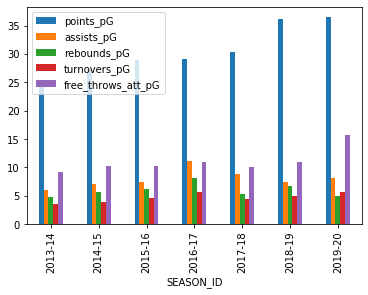

In [54]:
dfharden_sub[::-1].plot(x='SEASON_ID', y =['points_pG', 'assists_pG','rebounds_pG', 'turnovers_pG','free_throws_att_pG'], kind='bar').legend(loc='upper left');

In [55]:
dfharden_sub2 = dfharden_merged[['SEASON_ID', 'FG_PCT', 'FG3_PCT','FT_PCT' ]]

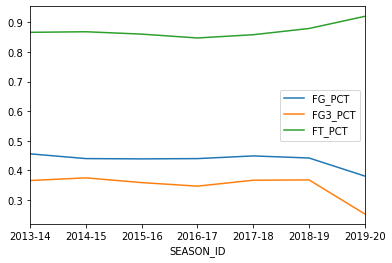

In [56]:
dfharden_sub2[::-1].plot(x='SEASON_ID', y =[ 'FG_PCT', 'FG3_PCT','FT_PCT']);

In [13]:
df99.drop(['PLAYER_ID','LEAGUE_ID','TEAM_ID','PLAYER_AGE' ],axis=1 , inplace=True)

In [14]:
df99

,SEASON_ID,TEAM_ABBREVIATION,GP,GS,MIN,FGM,FGA,FG_PCT,FG3M,FG3A,...,FT_PCT,OREB,DREB,REB,AST,STL,BLK,TOV,PF,PTS
0,2009-10,OKC,76,0,1738,233,578,0.403,93,248,...,0.808,47,197,244,137,80,20,106,200,753
1,2010-11,OKC,82,5,2189,298,684,0.436,113,324,...,0.843,42,213,255,176,92,24,106,207,998
2,2011-12,OKC,62,2,1946,309,629,0.491,114,292,...,0.846,30,222,252,229,62,15,137,150,1044
3,2012-13,HOU,78,78,2985,585,1337,0.438,179,486,...,0.851,62,317,379,455,142,38,295,178,2023
4,2013-14,HOU,73,73,2777,549,1205,0.456,177,483,...,0.866,61,283,344,446,115,29,265,177,1851
5,2014-15,HOU,81,81,2981,647,1470,0.440,208,555,...,0.868,75,384,459,565,154,60,321,208,2217
6,2015-16,HOU,82,82,3125,710,1617,0.439,236,657,...,0.860,63,438,501,612,139,51,374,229,2376
7,2016-17,HOU,81,81,2947,674,1533,0.440,262,756,...,0.847,95,564,659,907,121,38,464,215,2356
8,2017-18,HOU,72,72,2551,651,1449,0.449,265,722,...,0.858,41,348,389,630,126,50,315,169,2191
9,2018-19,HOU,78,78,2867,843,1909,0.442,378,1028,...,0.879,66,452,518,586,158,58,387,244,2818


In [15]:
df99.rename(columns = {'TEAM_ABBREVIATION': 'TEAM'}, inplace=True)

In [16]:
df99

,SEASON_ID,TEAM,GP,GS,MIN,FGM,FGA,FG_PCT,FG3M,FG3A,...,FT_PCT,OREB,DREB,REB,AST,STL,BLK,TOV,PF,PTS
0,2009-10,OKC,76,0,1738,233,578,0.403,93,248,...,0.808,47,197,244,137,80,20,106,200,753
1,2010-11,OKC,82,5,2189,298,684,0.436,113,324,...,0.843,42,213,255,176,92,24,106,207,998
2,2011-12,OKC,62,2,1946,309,629,0.491,114,292,...,0.846,30,222,252,229,62,15,137,150,1044
3,2012-13,HOU,78,78,2985,585,1337,0.438,179,486,...,0.851,62,317,379,455,142,38,295,178,2023
4,2013-14,HOU,73,73,2777,549,1205,0.456,177,483,...,0.866,61,283,344,446,115,29,265,177,1851
5,2014-15,HOU,81,81,2981,647,1470,0.440,208,555,...,0.868,75,384,459,565,154,60,321,208,2217
6,2015-16,HOU,82,82,3125,710,1617,0.439,236,657,...,0.860,63,438,501,612,139,51,374,229,2376
7,2016-17,HOU,81,81,2947,674,1533,0.440,262,756,...,0.847,95,564,659,907,121,38,464,215,2356
8,2017-18,HOU,72,72,2551,651,1449,0.449,265,722,...,0.858,41,348,389,630,126,50,315,169,2191
9,2018-19,HOU,78,78,2867,843,1909,0.442,378,1028,...,0.879,66,452,518,586,158,58,387,244,2818


In [17]:
df99.set_index('SEASON_ID', inplace=True)

In [18]:
df99.drop(['GS','OREB','DREB'],axis=1 , inplace=True)

In [19]:
df99

,TEAM,GP,MIN,FGM,FGA,FG_PCT,FG3M,FG3A,FG3_PCT,FTM,FTA,FT_PCT,REB,AST,STL,BLK,TOV,PF,PTS
SEASON_ID,,,,,,,,,,,,,,,,,,,
2009-10,OKC,76,1738,233,578,0.403,93,248,0.375,194,240,0.808,244,137,80,20,106,200,753
2010-11,OKC,82,2189,298,684,0.436,113,324,0.349,289,343,0.843,255,176,92,24,106,207,998
2011-12,OKC,62,1946,309,629,0.491,114,292,0.390,312,369,0.846,252,229,62,15,137,150,1044
2012-13,HOU,78,2985,585,1337,0.438,179,486,0.368,674,792,0.851,379,455,142,38,295,178,2023
2013-14,HOU,73,2777,549,1205,0.456,177,483,0.366,576,665,0.866,344,446,115,29,265,177,1851
2014-15,HOU,81,2981,647,1470,0.440,208,555,0.375,715,824,0.868,459,565,154,60,321,208,2217
2015-16,HOU,82,3125,710,1617,0.439,236,657,0.359,720,837,0.860,501,612,139,51,374,229,2376
2016-17,HOU,81,2947,674,1533,0.440,262,756,0.347,746,881,0.847,659,907,121,38,464,215,2356
2017-18,HOU,72,2551,651,1449,0.449,265,722,0.367,624,727,0.858,389,630,126,50,315,169,2191


In [20]:
df99.reset_index().plot(x= 'SEASON_ID', y = 'FG_PCT');

In [21]:
df99.reset_index(inplace=True)

In [22]:
df99

,SEASON_ID,TEAM,GP,MIN,FGM,FGA,FG_PCT,FG3M,FG3A,FG3_PCT,FTM,FTA,FT_PCT,REB,AST,STL,BLK,TOV,PF,PTS
0,2009-10,OKC,76,1738,233,578,0.403,93,248,0.375,194,240,0.808,244,137,80,20,106,200,753
1,2010-11,OKC,82,2189,298,684,0.436,113,324,0.349,289,343,0.843,255,176,92,24,106,207,998
2,2011-12,OKC,62,1946,309,629,0.491,114,292,0.390,312,369,0.846,252,229,62,15,137,150,1044
3,2012-13,HOU,78,2985,585,1337,0.438,179,486,0.368,674,792,0.851,379,455,142,38,295,178,2023
4,2013-14,HOU,73,2777,549,1205,0.456,177,483,0.366,576,665,0.866,344,446,115,29,265,177,1851
5,2014-15,HOU,81,2981,647,1470,0.440,208,555,0.375,715,824,0.868,459,565,154,60,321,208,2217
6,2015-16,HOU,82,3125,710,1617,0.439,236,657,0.359,720,837,0.860,501,612,139,51,374,229,2376
7,2016-17,HOU,81,2947,674,1533,0.440,262,756,0.347,746,881,0.847,659,907,121,38,464,215,2356
8,2017-18,HOU,72,2551,651,1449,0.449,265,722,0.367,624,727,0.858,389,630,126,50,315,169,2191
9,2018-19,HOU,78,2867,843,1909,0.442,378,1028,0.368,754,858,0.879,518,586,158,58,387,244,2818


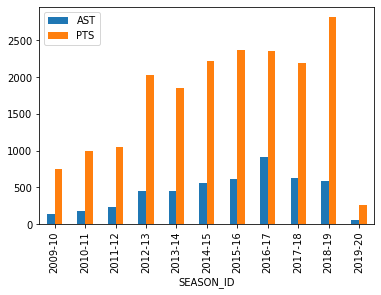

In [23]:
df99.plot(x='SEASON_ID', y =['AST', 'PTS'], kind='bar');
